## Quaternion and dual quaternion backtracking examples

In [11]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import torch
import numpy as np
import torchdualquat as dq
import torchquat as q
import matplotlib.pyplot as plt

import math

In [2]:
dqr1 = q.Quaternion(torch.tensor([1.,0.,0.,0.]))
dqd1 = q.Quaternion(torch.tensor([0.,math.sqrt(2)/2,math.sqrt(2)/2,math.sqrt(2)/2]))

dq1 = dq.DualQuaternion(dqr1,dqd1)

dqr2 = q.Quaternion(torch.tensor([1.,0.,0.,0.]))
dqd2 = q.Quaternion(torch.tensor([0.,math.sqrt(3)/2,math.sqrt(3)/2,math.sqrt(3)/2]))

dq2 = dq1 = dq.DualQuaternion(dqr2,dqd2)


print(dq1*dq2*dq1.conjugate())
# tensor([1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.8660, 0.8660, 0.8660])
# print(dq2)

tensor([1., 0., 0., 0.]) + epsilon *tensor([0.0000, 0.8660, 0.8660, 0.8660])


## Create a scene with pure dual quaternions

In [3]:
def constructSphere(Npoints):
    '''
        origin centered sphere with radius one, with points that are some dual quaternions 
        dual part is a pure quaternion and real part is a real quaterion
    '''
    sphere = np.zeros((Npoints,8))
    for i in range(Npoints):
        u = np.random.normal(0,1)
        v = np.random.normal(0,1)
        w = np.random.normal(0,1)
        norm = (u*u + v*v + w*w)**(0.5)
        (x,y,z) = (u/norm,v/norm,w/norm)
   
        sphere[i,0] = 1
        sphere[i,5] = x #.append(ptTorch)
        sphere[i,6] = y #.append(ptTorch)
        sphere[i,7] = z #.append(ptTorch)

    return dq.DualQuaternion(sphere[:,:4],sphere[:,4:])

In [4]:

N=8
dq_scene = constructSphere(N)

### Transformation

In [5]:
vecOfRotationsAxisAnglesRot = torch.from_numpy(np.expand_dims(np.linspace(0,2*torch.pi,N),axis=1)*(np.array( N*[1.,0,0]).reshape(N,-1))).double() 
qPure = torch.from_numpy(np.expand_dims(np.linspace(0,np.sqrt(2)/2,N),axis=1)*(np.array(N*[1,1,1]).reshape(N,-1))).double()


dqTarget = dq.DualQuaternion.fromAxisAngle_Translation(vecOfRotationsAxisAnglesRot,qPure)


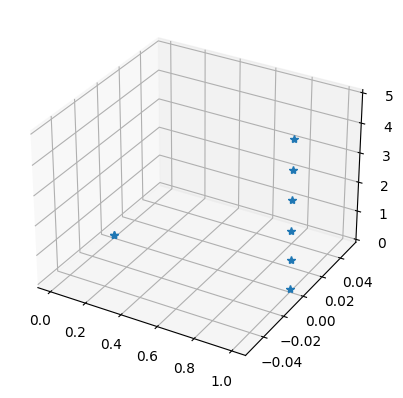

In [15]:
Qvert = torch.zeros((N,8))
Qvert[0,:] = torch.Tensor([1.,0,0,0,0,1.,0.,0.])
Qvert[1,:] = torch.Tensor([1.,0,0,0,0,1.,0.,1.])
Qvert[2,:] = torch.Tensor([1.,0,0,0,0,1.,0.,2.])
Qvert[3,:] = torch.Tensor([1.,0,0,0,0,1.,0.,3.])
Qvert[4,:] = torch.Tensor([1.,0,0,0,0,1.,0.,4.])
Qvert[5,:] = torch.Tensor([1.,0,0,0,0,1.,0.,5.])
Qvert = Qvert.double()
dqvert = dq.DualQuaternion(Qvert[:,:4],Qvert[:,4:])

ax = plt.figure().add_subplot(projection='3d')
ax.plot(dqvert.qd.detach().numpy()[:,1],dqvert.qd.detach().numpy()[:,2],dqvert.qd.detach().numpy()[:,3],'*')
